loading the dataset

In [1]:
import pandas as pd

data = pd.read_csv('data.csv')

data exploration

In [2]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None
                                                 Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Net sales decreased to EUR 220.5 mn from EUR 4...   neutral
freq                                      

In [3]:
print(data['Sentiment'].value_counts())

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


tokenization

In [5]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

data['Tokens'] = data['Sentence'].apply(tokenize_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
print(data[['Tokens', 'Sentence']].head())

                                              Tokens  \
0  [The, GeoSolutions, technology, will, leverage...   
1  [$, ESI, on, lows, ,, down, $, 1.50, to, $, 2....   
2  [For, the, last, quarter, of, 2010, ,, Compone...   
3  [According, to, the, Finnish-Russian, Chamber,...   
4  [The, Swedish, buyout, firm, has, sold, its, r...   

                                            Sentence  
0  The GeoSolutions technology will leverage Bene...  
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  
2  For the last quarter of 2010 , Componenta 's n...  
3  According to the Finnish-Russian Chamber of Co...  
4  The Swedish buyout firm has sold its remaining...  


cleaning

In [9]:
import string

def clean_tokens(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Removing punctuation and convert to lowercase
        cleaned_token = token.lower().translate(str.maketrans('', '', string.punctuation))
        if cleaned_token:
            cleaned_tokens.append(cleaned_token)
    return cleaned_tokens

data['cleaned_tokens'] = data['Tokens'].apply(clean_tokens)
print(data[['Tokens', 'cleaned_tokens']].head())

                                              Tokens  \
0  [The, GeoSolutions, technology, will, leverage...   
1  [$, ESI, on, lows, ,, down, $, 1.50, to, $, 2....   
2  [For, the, last, quarter, of, 2010, ,, Compone...   
3  [According, to, the, Finnish-Russian, Chamber,...   
4  [The, Swedish, buyout, firm, has, sold, its, r...   

                                      cleaned_tokens  
0  [the, geosolutions, technology, will, leverage...  
1  [esi, on, lows, down, 150, to, 250, bk, a, rea...  
2  [for, the, last, quarter, of, 2010, componenta...  
3  [according, to, the, finnishrussian, chamber, ...  
4  [the, swedish, buyout, firm, has, sold, its, r...  


normalization(stemming & lemmatization)

In [10]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

data['lemmatized_tokens'] = data['cleaned_tokens'].apply(lemmatize_tokens)
print(data[['cleaned_tokens', 'lemmatized_tokens']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


                                      cleaned_tokens  \
0  [the, geosolutions, technology, will, leverage...   
1  [esi, on, lows, down, 150, to, 250, bk, a, rea...   
2  [for, the, last, quarter, of, 2010, componenta...   
3  [according, to, the, finnishrussian, chamber, ...   
4  [the, swedish, buyout, firm, has, sold, its, r...   

                                   lemmatized_tokens  
0  [the, geosolutions, technology, will, leverage...  
1  [esi, on, low, down, 150, to, 250, bk, a, real...  
2  [for, the, last, quarter, of, 2010, componenta...  
3  [according, to, the, finnishrussian, chamber, ...  
4  [the, swedish, buyout, firm, ha, sold, it, rem...  


stop word removal

In [11]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

data['filtered_tokens'] = data['lemmatized_tokens'].apply(remove_stopwords)
print(data[['lemmatized_tokens', 'filtered_tokens']].head())

                                   lemmatized_tokens  \
0  [the, geosolutions, technology, will, leverage...   
1  [esi, on, low, down, 150, to, 250, bk, a, real...   
2  [for, the, last, quarter, of, 2010, componenta...   
3  [according, to, the, finnishrussian, chamber, ...   
4  [the, swedish, buyout, firm, ha, sold, it, rem...   

                                     filtered_tokens  
0  [geosolutions, technology, leverage, benefon, ...  
1        [esi, low, 150, 250, bk, real, possibility]  
2  [last, quarter, 2010, componenta, net, sale, d...  
3  [according, finnishrussian, chamber, commerce,...  
4  [swedish, buyout, firm, ha, sold, remaining, 2...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

data['processed_text'] = data['filtered_tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(data['processed_text'])

y = data['Sentiment']
print(X.shape)  # Printing the shape of the vectorized data
print(y.shape)  # Printing the shape of the labels

(5842, 5000)
(5842,)


model building

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Spliltting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.67      0.06      0.11       175
     neutral       0.68      0.94      0.79       622
    positive       0.70      0.55      0.62       372

    accuracy                           0.68      1169
   macro avg       0.68      0.52      0.50      1169
weighted avg       0.68      0.68      0.63      1169



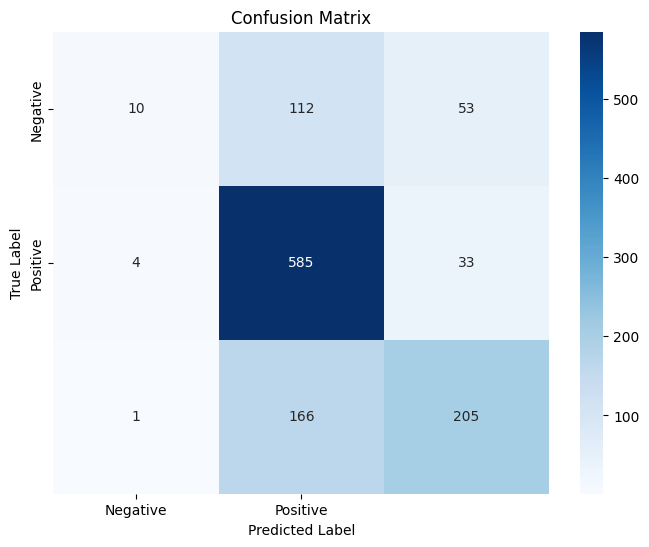

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()